Saving cv-19.csv to cv-19 (6).csv
Claves disponibles: dict_keys(['cv-19 (6).csv'])
Nombre del archivo: cv-19 (6).csv
19. Medidas de la forma de la distribución, de la posición relativa y de la detección de observaciones atípicas:
Asimetría: 7.049187119975137
Curtosis: 64.90172251204207
Percentiles:
0.25      23649.0
0.50     203711.0
0.75    1256286.0
Name: total_casos, dtype: float64
Observaciones atípicas:
   id   ciudad  total_casos  total_bajas  nuevas_bajas  total_recaidas  \
0   1      USA     98166904    1084282.0           NaN      94962112.0   
1   2    India     44587307     528629.0           NaN      44019095.0   
2   3   France     35342950     155078.0           NaN      34527115.0   
3   4   Brazil     34706757     686027.0           NaN      33838636.0   
4   5  Germany     33312373     149948.0           NaN      32315200.0   

   casos_activos  casos_criticos  
0      2120510.0          2970.0  
1        39583.0           698.0  
2       660757.0           869.0  
3  

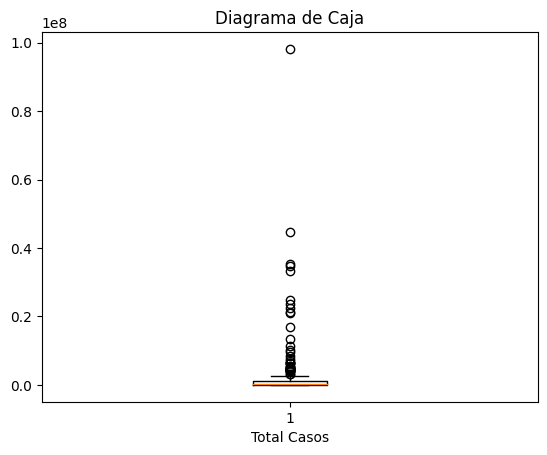


21. Medidas de la Asociación entre dos Variables:
Covarianza: 807411788447.1278
Coeficiente de Correlación: 0.8907651733509835

22. Análisis exploratorio de datos: Resumen de 5 números:
     total_bajas
min          1.0
25%        202.0
50%       2179.0
75%      14122.0
max    1084282.0


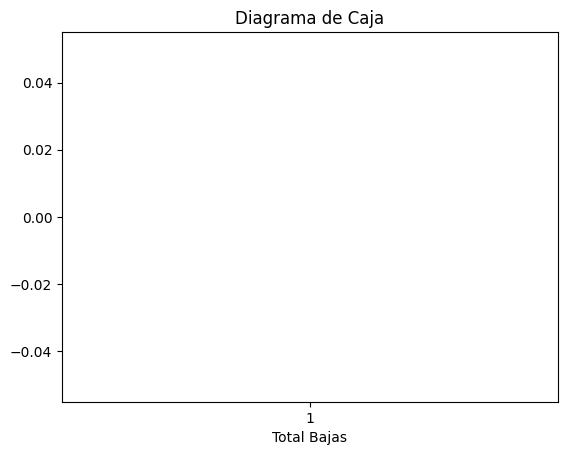


23. Medidas de la Asociación entre dos Variables:
Covarianza: 79990035105614.81
Coeficiente de Correlación: 0.9999043863085149

24. Análisis exploratorio de datos: Resumen de 5 números:
     total_recaidas
min            2.00
25%        19683.25
50%       225011.00
75%      1437441.00
max     94962112.00


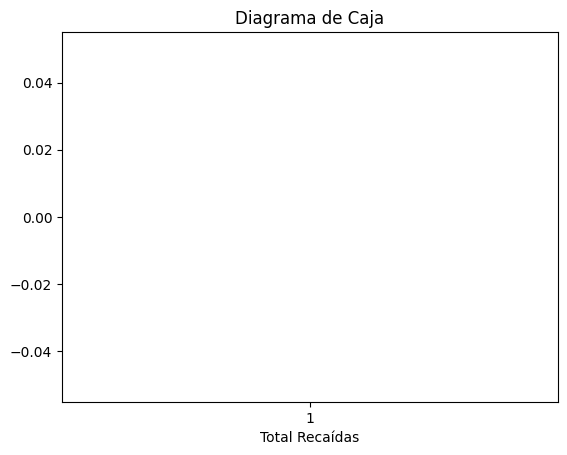


25. Medidas de la Asociación entre dos Variables:
Covarianza: 1511465949585.2063
Coeficiente de Correlación: 0.804821981982021

26. Análisis exploratorio de datos: Resumen de 5 números:
     nuevas_bajas
min           3.0
25%           6.0
50%           9.0
75%          25.5
max          42.0


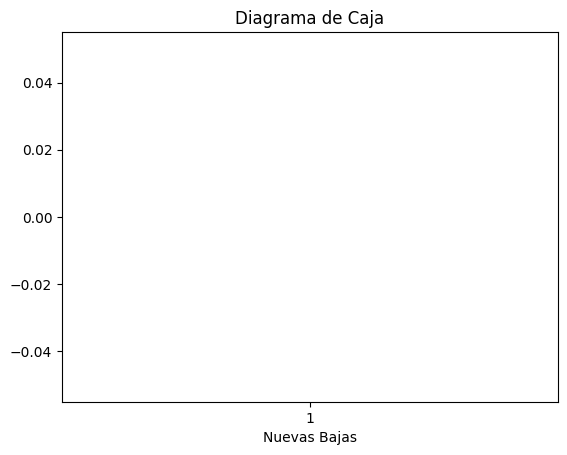


27. Medidas de la Asociación entre dos Variables:
Covarianza: 264368836.5
Coeficiente de Correlación: 0.999808197735798

28. Análisis exploratorio de datos: Resumen de 5 números:
     total_recaidas
min            2.00
25%        19683.25
50%       225011.00
75%      1437441.00
max     94962112.00


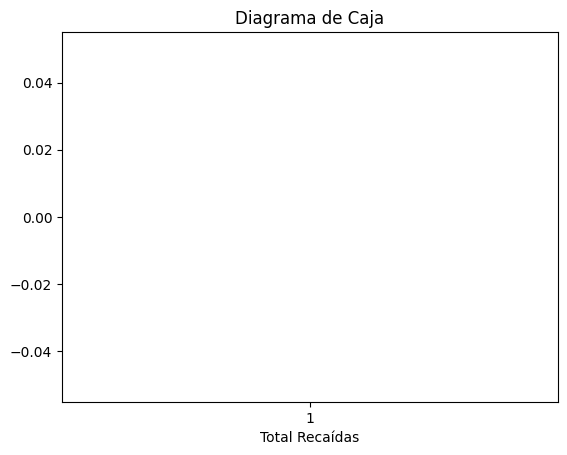


29. Medidas de la Asociación entre dos Variables:
Covarianza: 4919530514.15837
Coeficiente de Correlación: 0.49634516975818843

30. Análisis exploratorio de datos: Resumen de 5 números:
     casos_criticos
min             1.0
25%             4.5
50%            18.0
75%           101.0
max          8318.0


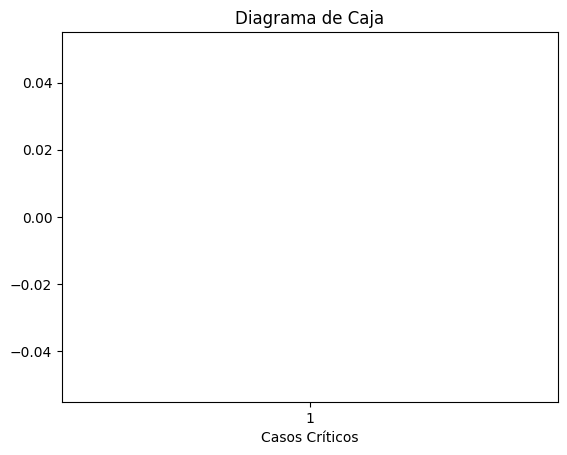


31. Medidas de la Asociación entre dos Variables:
Covarianza: 264368836.5
Coeficiente de Correlación: 0.999808197735798

32. Análisis exploratorio de datos: Resumen de 5 números:
     nuevas_bajas
min           3.0
25%           6.0
50%           9.0
75%          25.5
max          42.0


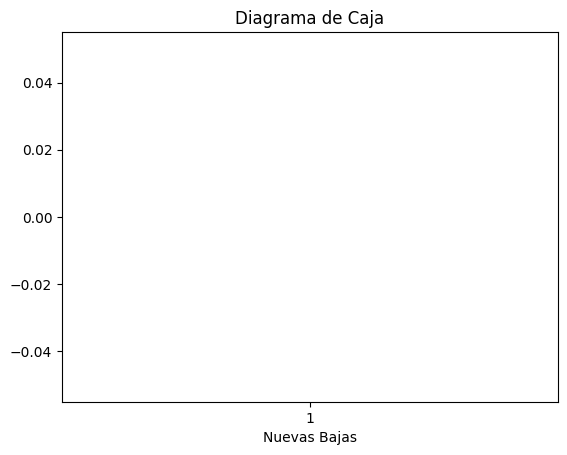


33. Análisis exploratorio de datos: Resumen de 5 números:
     casos_activos
min            0.0
25%          132.0
50%         1246.0
75%        19239.5
max      2120510.0


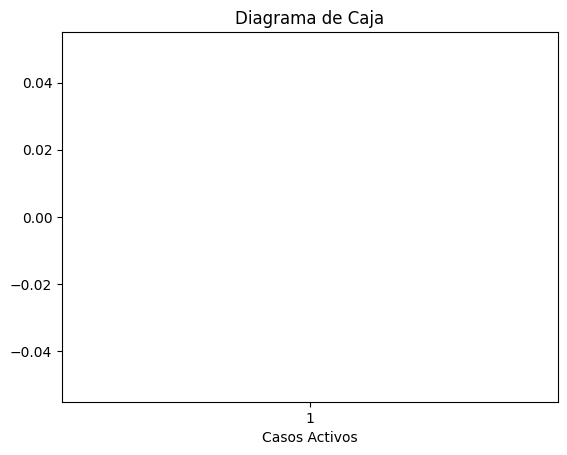

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Función para cargar el CSV desde Google Colab
def load_csv():
    # Cargar el CSV desde Google Colab
    from google.colab import files
    uploaded = files.upload()

    # Imprimir las claves disponibles
    print("Claves disponibles:", uploaded.keys())

    # Obtener el nombre del archivo (clave)
    file_name = list(uploaded.keys())[0]  # Obtener el primer (y único) elemento de las claves
    print("Nombre del archivo:", file_name)

    # Leer el CSV
    # Decodificar los bytes a una cadena antes de usar io.StringIO
    df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), thousands=',')

    return df

# Cargar el CSV
df = load_csv()

# 19. Medidas de la forma de la distribución, de la posición relativa y de la detección de observaciones atípicas
asimetria = df['total_casos'].skew()
curtosis = df['total_casos'].kurtosis()
percentiles = df['total_casos'].quantile([0.25, 0.5, 0.75])
z_scores = (df['total_casos'] - df['total_casos'].mean()) / df['total_casos'].std()
outliers = df[abs(z_scores) > 3]

print("19. Medidas de la forma de la distribución, de la posición relativa y de la detección de observaciones atípicas:")
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Percentiles:")
print(percentiles)
print("Observaciones atípicas:")
print(outliers)

# 20. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df['total_casos'].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n20. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['total_casos'])
plt.xlabel('Total Casos')
plt.title('Diagrama de Caja')
plt.show()

# 21. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df[['total_casos', 'total_bajas']].cov().loc['total_casos', 'total_bajas']
correlacion = df[['total_casos', 'total_bajas']].corr().loc['total_casos', 'total_bajas']

print("\n21. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)

# 22. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df[['total_bajas']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n22. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['total_bajas'])
plt.xlabel('Total Bajas')
plt.title('Diagrama de Caja')
plt.show()


# 23. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df[['total_casos', 'total_recaidas']].cov().loc['total_casos', 'total_recaidas']
correlacion = df[['total_casos', 'total_recaidas']].corr().loc['total_casos', 'total_recaidas']

print("\n23. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)

# 24. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df[['total_recaidas']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n24. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['total_recaidas'])
plt.xlabel('Total Recaídas')
plt.title('Diagrama de Caja')
plt.show()

# 25. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df[['total_casos', 'casos_activos']].cov().loc['total_casos', 'casos_activos']
correlacion = df[['total_casos', 'casos_activos']].corr().loc['total_casos', 'casos_activos']

print("\n25. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)
# 26. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df[['nuevas_bajas']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n26. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['nuevas_bajas'])
plt.xlabel('Nuevas Bajas')
plt.title('Diagrama de Caja')
plt.show()

# 27. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df[['total_casos', 'nuevas_bajas']].cov().loc['total_casos', 'nuevas_bajas']
correlacion = df[['total_casos', 'nuevas_bajas']].corr().loc['total_casos', 'nuevas_bajas']

print("\n27. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)

# 28. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df[['total_recaidas']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n28. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['total_recaidas'])
plt.xlabel('Total Recaídas')
plt.title('Diagrama de Caja')
plt.show()

# Continuar con los análisis 29 a 32
# 29. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df[['total_casos', 'casos_criticos']].cov().loc['total_casos', 'casos_criticos']
correlacion = df[['total_casos', 'casos_criticos']].corr().loc['total_casos', 'casos_criticos']

print("\n29. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)

# 30. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df[['casos_criticos']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n30. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['casos_criticos'])
plt.xlabel('Casos Críticos')
plt.title('Diagrama de Caja')
plt.show()

# 31. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df[['total_casos', 'nuevas_bajas']].cov().loc['total_casos', 'nuevas_bajas']
correlacion = df[['total_casos', 'nuevas_bajas']].corr().loc['total_casos', 'nuevas_bajas']

print("\n31. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)

# 32. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df[['nuevas_bajas']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n32. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['nuevas_bajas'])
plt.xlabel('Nuevas Bajas')
plt.title('Diagrama de Caja')
plt.show()
# 33. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df[['casos_activos']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\n33. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['casos_activos'])
plt.xlabel('Casos Activos')
plt.title('Diagrama de Caja')
plt.show()

